<a href="https://colab.research.google.com/github/AnhHao552001/BT-ANN_CNN/blob/main/Cam_xuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [ ]:
# Load Data 
with open('data.Cam', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Reshape Data
x_pre_0 = x_train[2]
x_pre_1 = x_train[23]
x_pre_2 = x_train[55]
x_pre_3 = x_train[70]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
1/1 [==============================] - 14s 14s/step - loss: 2.2550 - acc: 0.0625 - val_loss: 33.7265 - val_acc: 0.1250
Epoch 2/15
1/1 [==============================] - 0s 154ms/step - loss: 26.1833 - acc: 0.2812 - val_loss: 9.4011 - val_acc: 0.3125
Epoch 3/15
1/1 [==============================] - 0s 151ms/step - loss: 13.7772 - acc: 0.2344 - val_loss: 5.0052 - val_acc: 0.2500
Epoch 4/15
1/1 [==============================] - 0s 144ms/step - loss: 6.2206 - acc: 0.3438 - val_loss: 2.8785 - val_acc: 0.2500
Epoch 5/15
1/1 [==============================] - 0s 149ms/step - loss: 2.9022 - acc: 0.2500 - val_loss: 1.8094 - val_acc: 0.2500
Epoch 6/15
1/1 [==============================] - 0s 149ms/step - loss: 1.7252 - acc: 0.2500 - val_loss: 1.7323 - val_acc: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 155ms/step - loss: 1.6086 - acc: 0.5625 - val_loss: 1.3253 - val_acc: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 152ms/step - loss: 1.2814 - acc: 0.

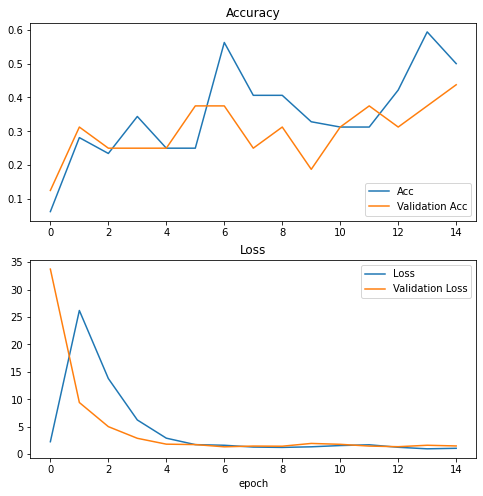

In [ ]:
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 12)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Acc')
plt.plot(val_f1, label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.show()
label = [ 'Giandu', 'hanhphuc', 'ngacnhien','buon']

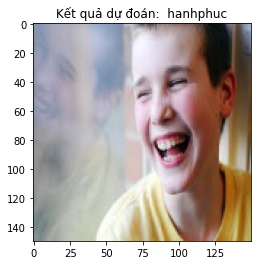

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

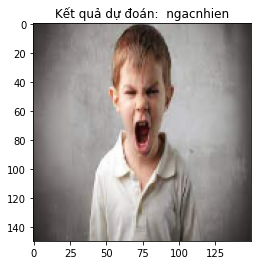

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_0.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_0, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

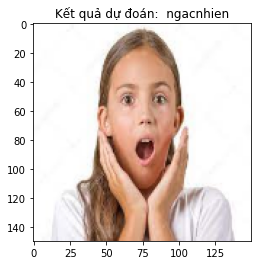

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

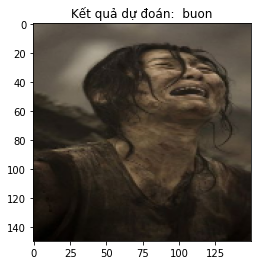

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))